<a href="https://www.quantrocket.com"><img alt="QuantRocket logo" src="https://www.quantrocket.com/assets/img/notebook-header-logo.png"></a><br>
<a href="https://www.quantrocket.com/disclaimer/">Disclaimer</a>

***
[Brain Sentiment Data](Introduction.ipynb) › Part 2: Brain Sentiment Indicator
***

# Brain Sentiment Indicator

In this notebook, we use Alphalens to examine the Brain Sentiment Indicator dataset (BSI). This dataset captures sentiment from news sources.

Start by setting the bundle for this notebook:

In [1]:
from zipline.research import use_bundle
use_bundle("usstock-1d-bundle")

Next, we create a Pipeline that contains the `BUZZ_VOLUME_SENTIMENT` field using a 1-day lookback. This field quantifies news volume relative to the past. We limit the analysis to the top 1000 stocks by dollar volume.

In [2]:
from zipline.pipeline import Pipeline, brain, master
from zipline.pipeline.factors import AverageDollarVolume

# limit analysis to stocks
universe = master.SecuritiesMaster.SecType.latest.eq("STK")

avg_dollar_volume = AverageDollarVolume(window_length=90)

buzz_volume_sentiment =  brain.BSI.slice(1).BUZZ_VOLUME_SENTIMENT.latest

pipeline = Pipeline(
    columns={
        "buzz_volume_sentiment": buzz_volume_sentiment,
    },
    initial_universe=universe,
    screen=(
        avg_dollar_volume.top(1000) 
        & buzz_volume_sentiment.notnull()
    )
)

Next, we run the Pipeline and generate the tear sheet. Stocks with higher than normal news volume (quantile 5) underperform stocks in other quantiles.

,min,max,mean,std,count,avg daily count,count %
Buzz Volume Sentiment Quantile,,,,,,,
1,-1.689,2.335,-0.488,0.328,"208,426",108.2,20.1%
2,-0.889,4.351,-0.133,0.416,"207,218",107.6,20.0%
3,-0.686,5.654,0.198,0.560,"207,228",107.6,20.0%
4,-0.535,8.723,0.688,0.779,"207,197",107.6,20.0%
5,-0.373,148.870,2.458,2.703,"207,959",108.0,20.0%


,1D,21D
Ann. alpha,-0.005,-0.009
beta,-0.004,-0.003
Mean Relative Return Top Quantile (bps),-0.643,-0.333
Mean Relative Return Bottom Quantile (bps),0.046,0.265
Mean Spread (bps),-0.689,-0.605


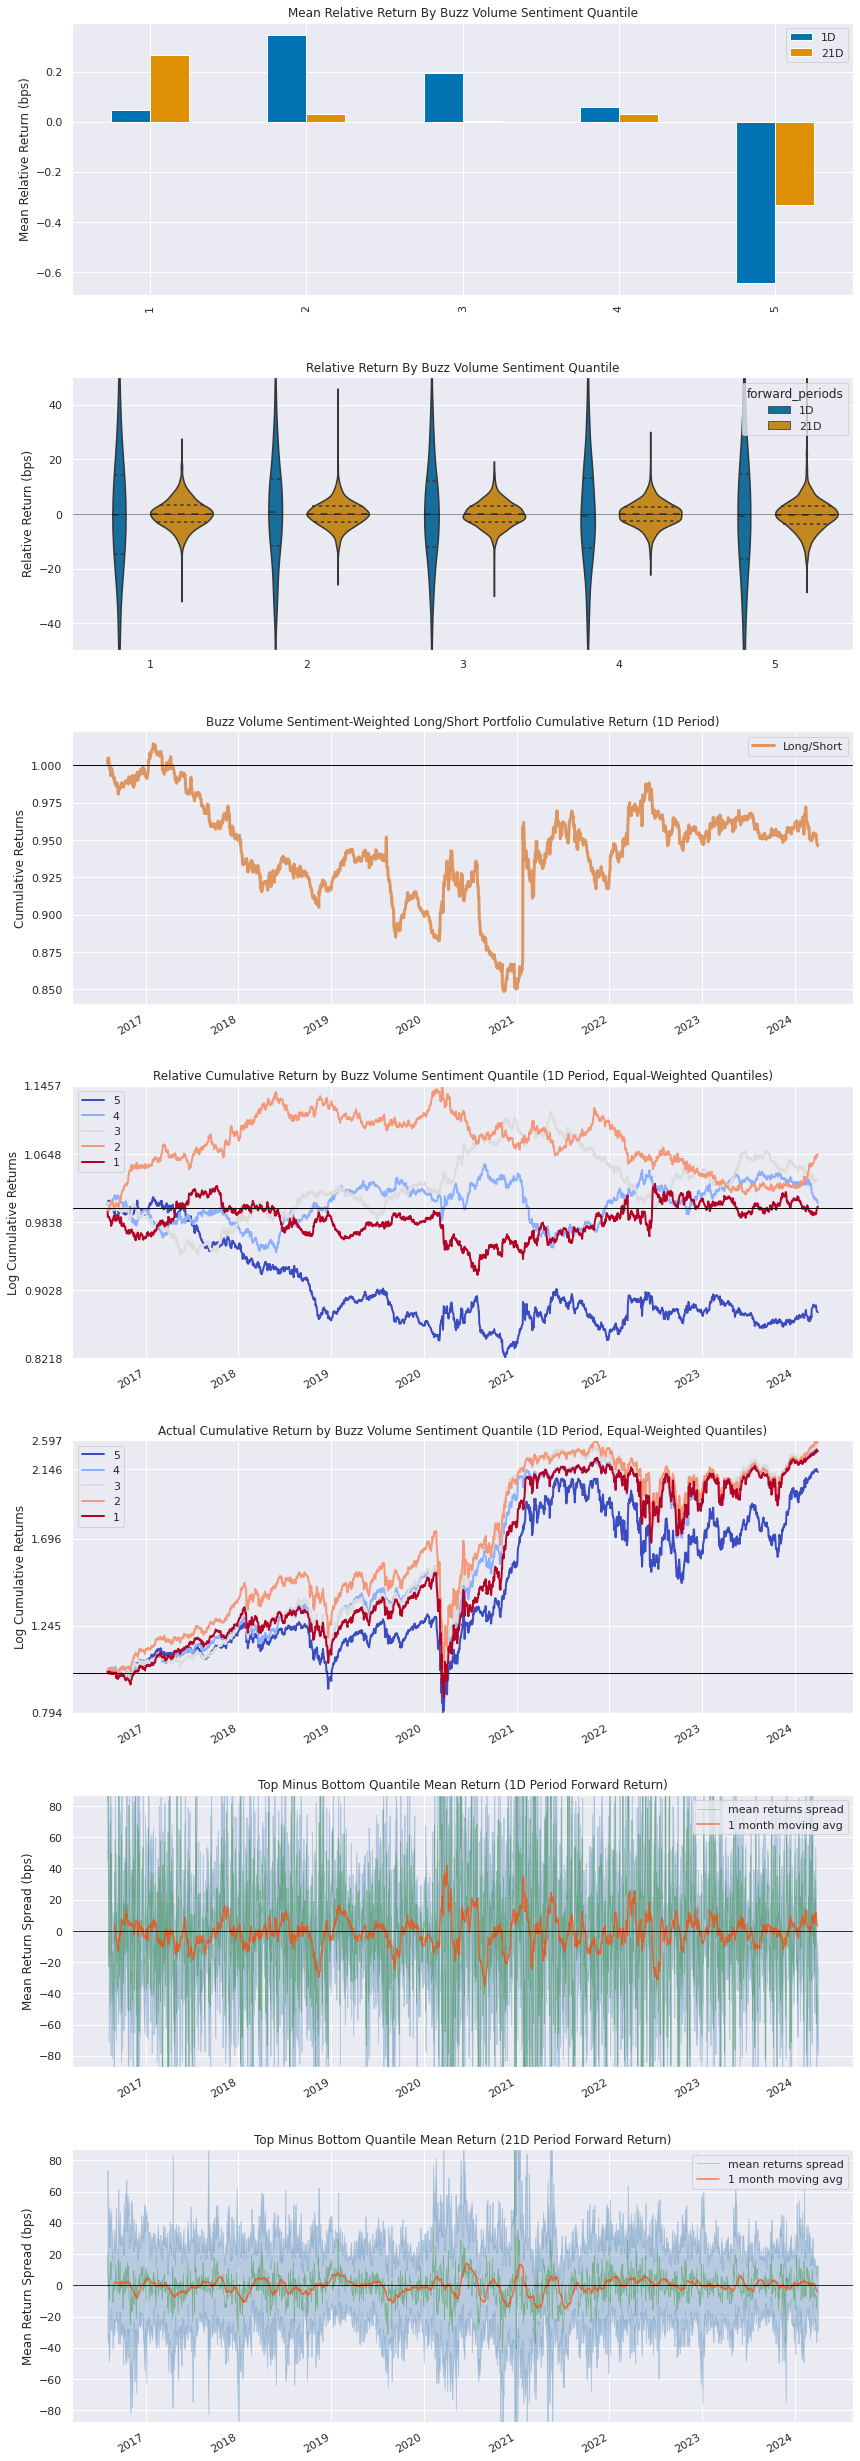

,1D,21D
IC Mean,-0.002,-0.005
IC Std.,0.063,0.060
Risk-Adjusted IC,-0.032,-0.081
t-stat(IC),-1.395,-3.575
p-value(IC),0.163,0.000
IC Skew,0.130,-0.196
IC Kurtosis,0.492,0.467


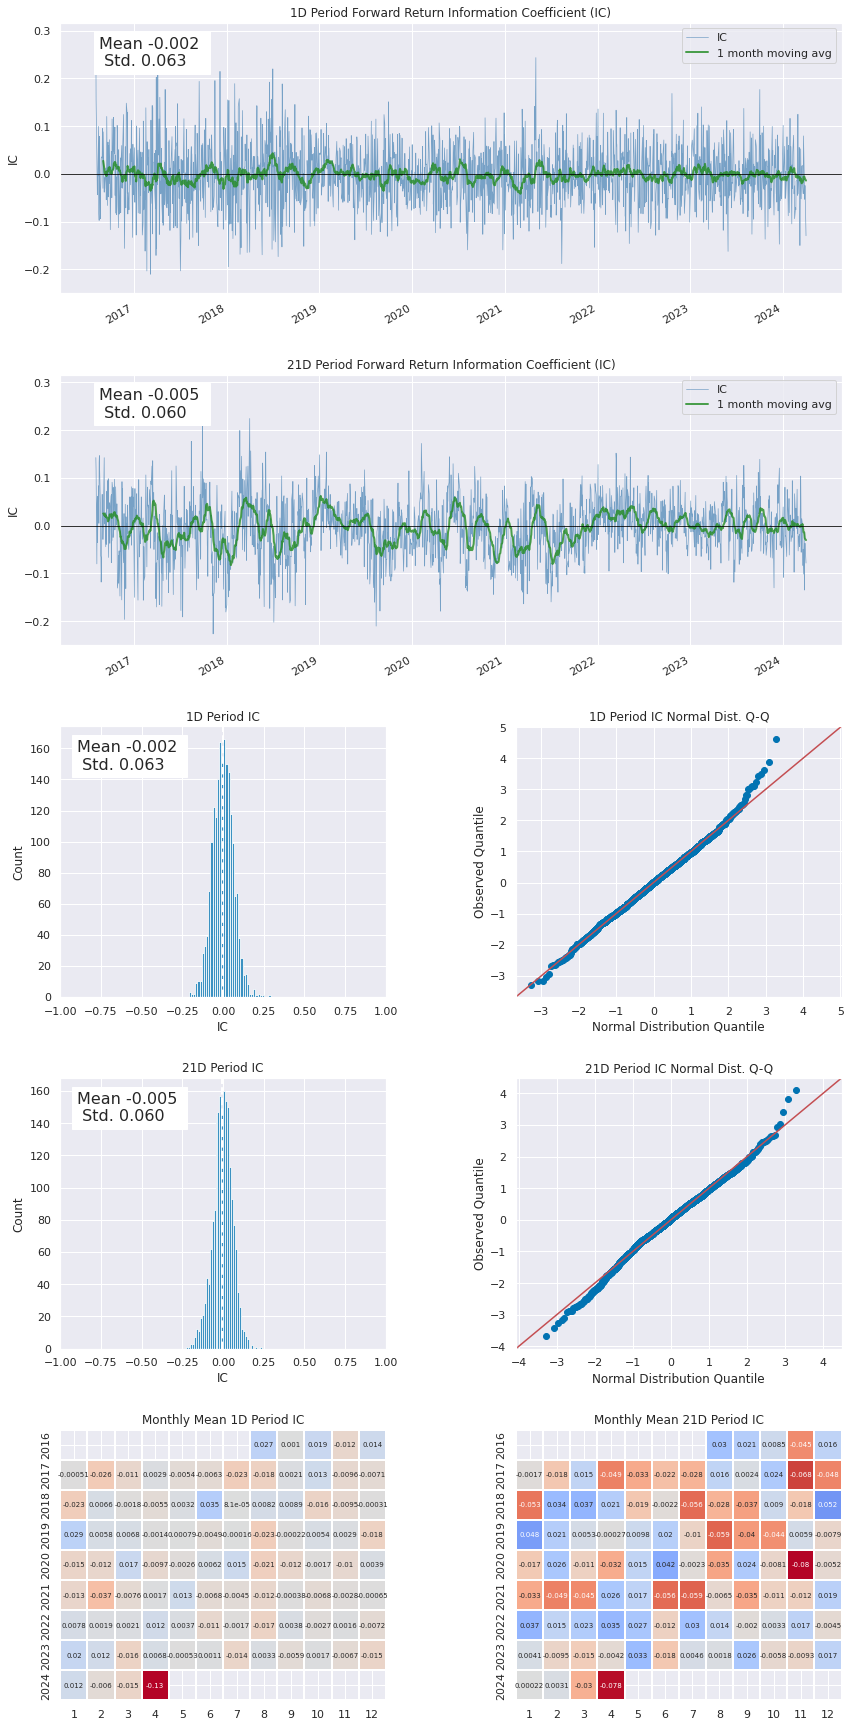

,1D,21D
Quantile 1 Mean Turnover,0.684,0.745
Quantile 2 Mean Turnover,0.800,0.828
Quantile 3 Mean Turnover,0.823,0.846
Quantile 4 Mean Turnover,0.823,0.851
Quantile 5 Mean Turnover,0.709,0.836


,1D,21D
Mean Factor Rank Autocorrelation,0.331,0.136


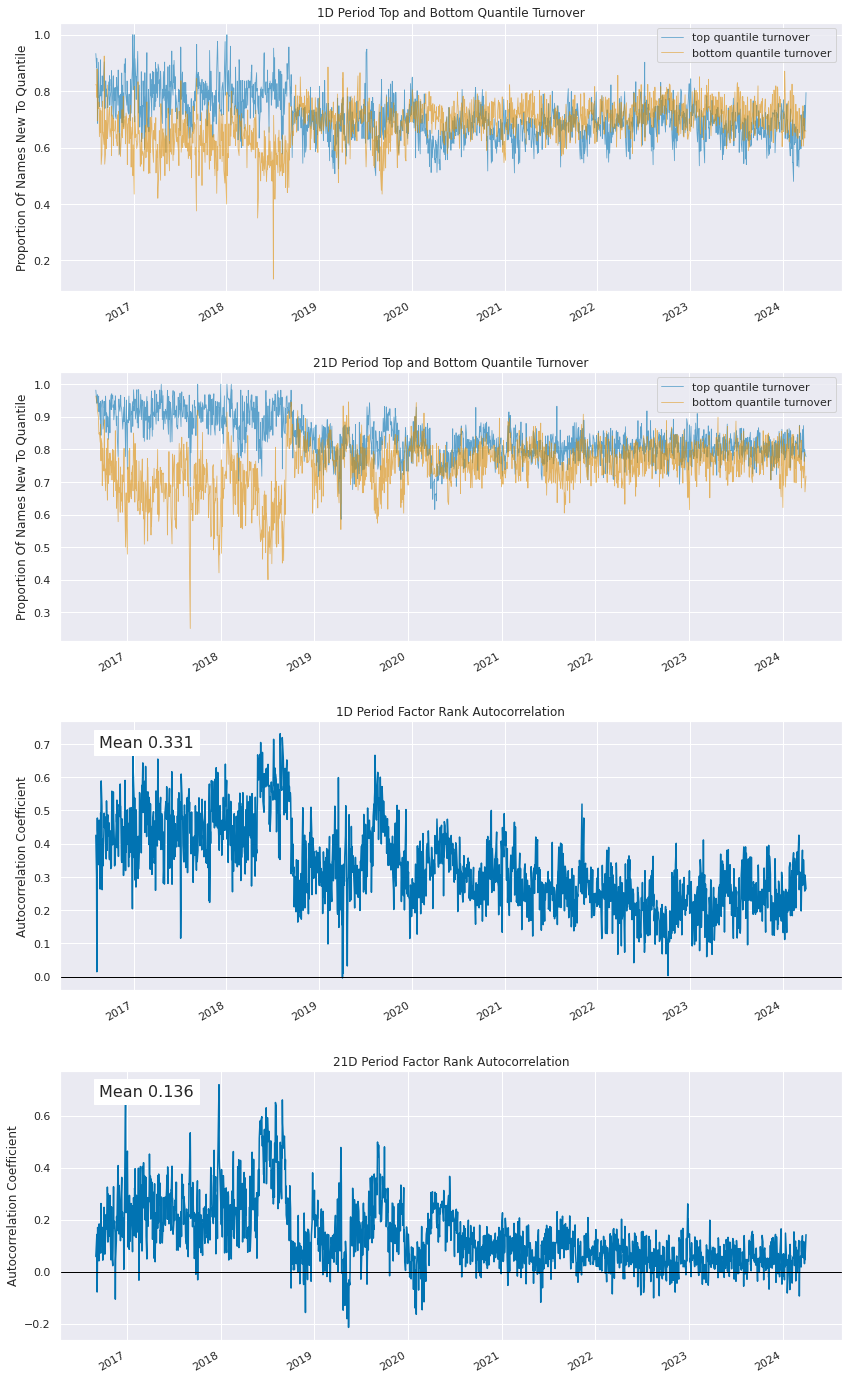

In [3]:
import alphalens as al

factor_data = al.from_pipeline(
    pipeline,
    start_date="2016-08-01", # start of dataset
    end_date="2024-03-31",
    factor="buzz_volume_sentiment",
    periods=[1, 21],
    quantiles=5,
    segment="Y"
)

***

## *Next Up*

Part 3: [Brain Language Metrics on Company Filings](Part3-Alphalens-BLMCF.ipynb)